# Analytics in Yandex.Afisha

## Research Objectives  
Yandex.Afisha is one of the most popular russian-speaking services for online sales of tickets for entertainment events: theaters, concerts, movies, musicals, shows and others.  
The purpose of this research is to find ways of Yandex.Afisha marketing costs optimization and to determine the best sources/platforms to attract buyers.  
The research is based on data from Yandex.Afisha from June 2017 to the end of May 2018.

## Work Plan:
1. Studying general information about the dataset and preparing data for analysis;  
2. Data analysis (building reports and calculating metrics);  
3. Formulation of conclusions and recommendations.

## Step 1. Studying general information about the dataset and preparing data for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

### Studying general information about the dataset

In [2]:
# Load dataframes from csv files
visits_df = pd.read_csv('datasets/visits_log.csv')
visits_df.name = 'visits_df'
orders_df = pd.read_csv('datasets/orders_log.csv')
orders_df.name = 'orders_df'
costs_df = pd.read_csv('datasets/costs.csv')
costs_df.name = 'costs_df'

dfs = [visits_df, orders_df, costs_df]

def display_df_info(df):
    """
    The function displays basic information on the dataframe, as well as its first 10 lines.
    """
    print('==========')
    print(df.name)
    print('==========')
    display(df.info())
    display(df.describe())
    display(df.head(10))
    
# Let's examine the general information about the available dataframes
for df in dfs:
    display_df_info(df)


visits_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


orders_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


costs_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


### Conclusion:

The following data is available for analysis:  
1. visits_df (server log with information about site visits):  
Uid - unique identifier of the user;  
Device - the category of the user's device;  
Start Ts - date and time of the session start;  
End Ts - date and time of the session end;  
Source Id - the identifier of the advertising source from which the user came.  
2. orders_df (orders information):  
Uid - unique id of the user who made the order;  
Buy Ts - date and time of the order;  
Revenue - Yandex.Afisha's revenue from this order.  
3. costs_df (information about marketing costs):  
source_id - advertising source identifier;  
dt - date;  
costs - expenses on this ad source that day.

### Data preparation

After examining the general information about the files, we see that there are no gaps in the data.  
However, the following data preparation steps are needed:  
1. Renaming columns (converting them to lower case, getting rid of spaces).  
2. Converting data that contains information about date and time to the datetime type;  
3. Checking data for duplicates.

#### Renaming columns

In [3]:
# Let's convert column names to lower case and replace spaces with underscores
for df in dfs:
    df.columns = df.columns.str.lower().str.replace(' ', '_')


#### Converting to proper data types

For the convenience of working with date and time, let's convert columns containing information about date and time to the `datetime` type

In [4]:
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'])
orders_df['buy_ts'] = pd.to_datetime(orders_df['buy_ts'])
costs_df['dt'] = pd.to_datetime(costs_df['dt'])


#### Ensure that dataset only contains the required period of time

In [5]:
print('visits_df min: ' + str(visits_df['start_ts'].min()))
print('visits_df max: ' + str(visits_df['start_ts'].max()))
print()
print('orders_df min: ' + str(orders_df['buy_ts'].min()))
print('orders_df max: ' + str(orders_df['buy_ts'].max()))
print()
print('costs_df min: ' + str(costs_df['dt'].min()))
print('costs_df max: ' + str(costs_df['dt'].max()))


visits_df min: 2017-06-01 00:01:00
visits_df max: 2018-05-31 23:59:00

orders_df min: 2017-06-01 00:10:00
orders_df max: 2018-06-01 00:02:00

costs_df min: 2017-06-01 00:00:00
costs_df max: 2018-05-31 00:00:00


As we can see, visits_df and orders_df contain values for June 1, 2018.  
Since the research is being conducted on data from Yandex.Afisha from June 2017 to the end of May 2018, the data for June 1, 2018 got into the dataset by mistake and must be deleted.

In [6]:
# Let's make a sample only for the required period
visits_df = visits_df[visits_df['start_ts'] < pd.Timestamp('2018-06-01 00:00')]
orders_df = orders_df[orders_df['buy_ts'] < pd.Timestamp('2018-06-01 00:00')]


#### Checking data for duplicates

In [7]:
for df in dfs:
    print('Number of duplicates in ' + df.name + ': ' + str(visits_df.duplicated().sum()))

Number of duplicates in visits_df: 0
Number of duplicates in orders_df: 0
Number of duplicates in costs_df: 0


### Conclusion

The initial preparation of the data for analysis has been completed. If necessary, additional preparation will be done during the data analysis.

## Step 2. Building reports and calculating metrics

### How many people use the product per day, week, month¶

#### To calculate DAU, WAU and MAU, let's put day, week, month and year in separate columns.

In [8]:
visits_df['session_month'] = visits_df['start_ts'].astype('datetime64[M]')
visits_df['session_week'] = visits_df['start_ts'].astype('datetime64[D]') - pd.to_timedelta(visits_df['start_ts'].dt.dayofweek, unit='d')
visits_df['session_date'] = visits_df['start_ts'].astype('datetime64[D]')


#### DAU (daily active users)

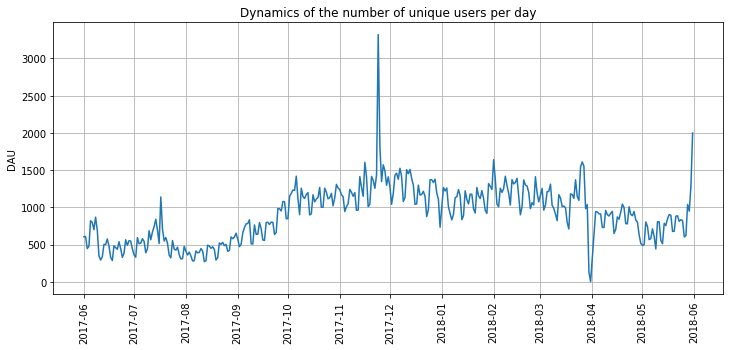

In [9]:
# Let's calculate DAU
dau = visits_df.groupby('session_date').agg(
    n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')
).reset_index()

# Display DAU change during the year
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot('session_date', 'n_uid', data=dau)
# Use year-month as xticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Dynamics of the number of unique users per day')
plt.ylabel('DAU')

plt.grid()
plt.show()



As you can see from the graph, the DAU value was subject to significant fluctuations during the study period. It peaked at the end of November 2017, while the end of March 2018 showed the lowest number of unique users per day.  
Because of that:  
- Median will be used as a measure of average DAU;  
- The time intervals where DAU significantly differed from the median value worth investigating in more detail.

In [10]:
# Let's calculate median value for DAU
dau_median = dau['n_uid'].median()
print("Median DAU value = " + str(dau_median))

# Since it is difficult to determine from the graph on which day the peak value of DAU was observed, 
# let's calculate on which day it was the maximum
dau_max = dau['n_uid'].max()
dau_max_date = dau[dau['n_uid'] == dau_max]['session_date']
print("Maximum DAU value = " + str(dau_max))
print('Date on which DAU was at its maximum: ' + dau_max_date.to_string(index=False))


Median DAU value = 921.0
Maximum DAU value = 3319
Date on which DAU was at its maximum: 2017-11-24


In [11]:
print(f"Date on which DAU was at its maximum: {dau.set_index('session_date').idxmax().dt.strftime('%Y-%m-%d')[0]}")

Date on which DAU was at its maximum: 2017-11-24


Thus, the median dau is 923 unique users per day.  
The maximum number of unique users (3303) was on November 24, 2017, the so-called "Black Friday". This is probably due to the discounts provided on that day.

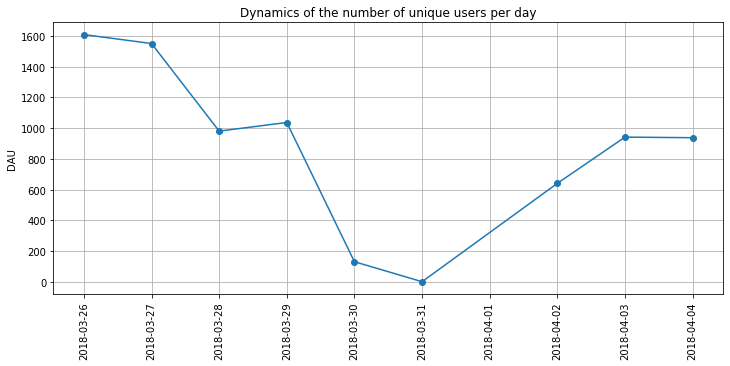

In [12]:
# Next let's investigate period of minimum DAU in more detail.
# Let's display DAU values as dots to see if data for each day is present.
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot('session_date', 'n_uid', 'o', linestyle='-', \
        data=dau[(dau['session_date'] > pd.Timestamp('2018-03-25 00:00')) & \
                  (dau['session_date'] < pd.Timestamp('2018-04-05 00:00'))])
# Зададим формат для xticks в виде месяц-день
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation = 90)
plt.title('Dynamics of the number of unique users per day')
plt.ylabel('DAU')
plt.grid()
plt.show()

As you can see from the graph, on March 31, the number of unique users was close to zero, and for April 1 there is no data at all.  
Perhaps the data for this period was not recorded due to a technical failure or for some other reason.

#### WAU (weekly active users)

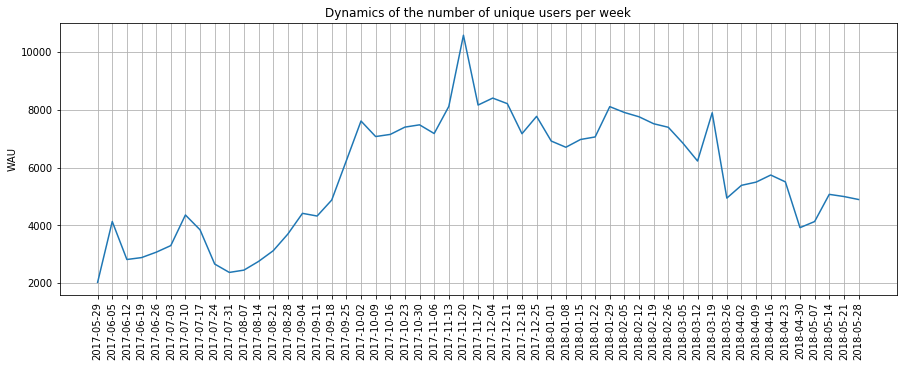

Median WAU value = 5740.0


In [13]:
wau = visits_df.groupby('session_week').agg(
    n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')
).reset_index()

# Since the week starting 2018-05-31 contains only 1 day, let's remove it from WAU
wau = wau[wau['session_week'] < pd.Timestamp('2018-05-31 00:00')]

# Let's display WAU changes during the year
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot('session_week', 'n_uid', data=wau)
plt.xticks(rotation = 90)
plt.xticks(wau['session_week'].unique())
plt.title('Dynamics of the number of unique users per week')
plt.ylabel('WAU')
plt.grid()
plt.show()

# Let's calculate median WAU
wau_median = wau['n_uid'].median()
print("Median WAU value = " + str(wau_median))


#### MAU (monthly active users)

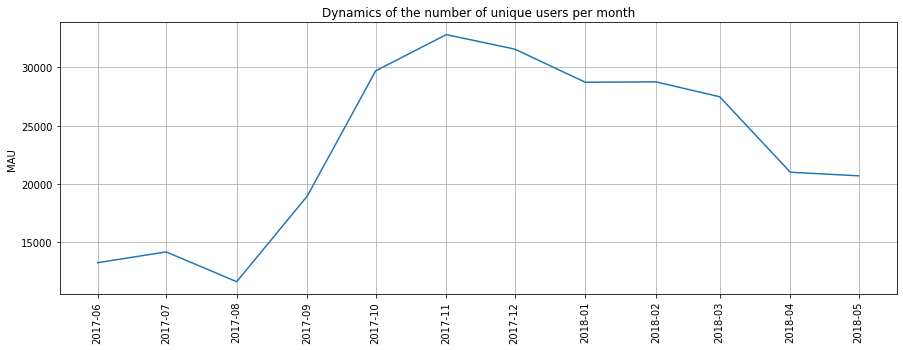

Median MAU value = 24240.5


In [14]:
mau = visits_df.groupby('session_month').agg(
    n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')
).reset_index()

# Let's display MAU changes during the year
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot('session_month', 'n_uid', data=mau)
# Let's set xticks format as year-month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.xticks(mau['session_month'].unique())
plt.title('Dynamics of the number of unique users per month')
plt.ylabel('MAU')
plt.grid()
plt.show()

# Let's calculate median MAU
mau_median = mau['n_uid'].median()
print("Median MAU value = " + str(mau_median))


### Conclusion

On average, the number of unique Yandex.Afisha users was: 923 users per day, 5737 per week, and 24240 per month (median values).  
However, these values changed significantly during the study period.  
Thus, the minimum number of users was observed in the summer months, when the MAU value did not exceed 15,000. Perhaps this is due to the vacation period.  
The maximum number of users was in the period November 2017 - March 2018 (mau over 25,000). The peak number of unique users was on November 24, 2017, the so-called "Black Friday". On this day, DAU made 3303 unique users per day.  

### Number of sessions per day

In [15]:
# Let's calculate the number of sessions and the number of unique users for each day
session_per_user = visits_df.groupby('session_date').agg\
(n_sessions = ('uid', 'count'), \
 n_users = ('uid', 'nunique')).reset_index()

# Let's calculate the average number of sessions for each unique user
session_per_user['dayly_sessions_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
dayly_sessions_per_user_mean = session_per_user['dayly_sessions_per_user'].mean()

print("Average user makes {:.2f} sessions per day.".format(dayly_sessions_per_user_mean))

Average user makes 1.08 sessions per day.


### Conclusion

Most users visit Yandex.Afisha only once a day.

### How long does one session last

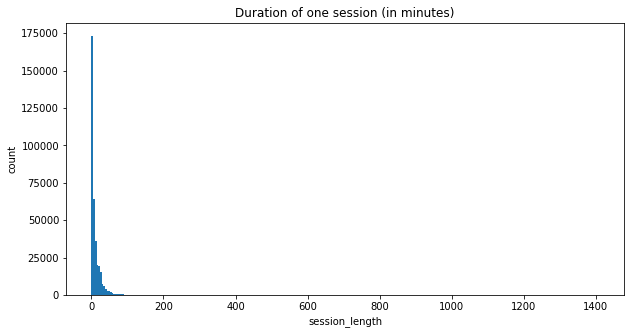

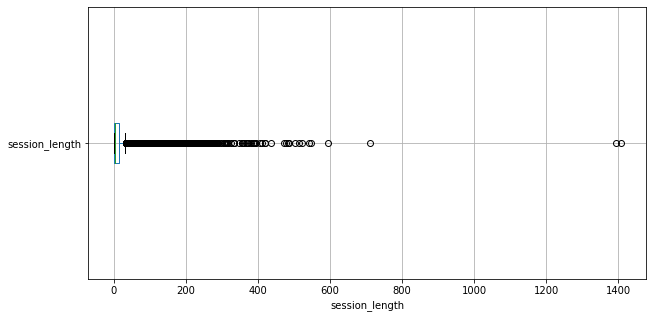

In [16]:
# Let's add info about sessions duration (in minutes) to the visits_df dataframe 
visits_df['session_length'] = ((visits_df['end_ts'] - visits_df['start_ts']).dt.seconds / 60).astype(int)

# Display sessios durations on histogram and boxplot
def show_hist_and_boxplot(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df['session_length'], bins=300)
    plt.title('Duration of one session (in minutes)')
    plt.ylabel('count')
    plt.xlabel('session_length')
    plt.show()
    plt.figure(figsize=(10, 5))
    plt.xlabel('session_length')
    df[['session_length']].boxplot(vert=False)
    plt.show()
    
show_hist_and_boxplot(visits_df)

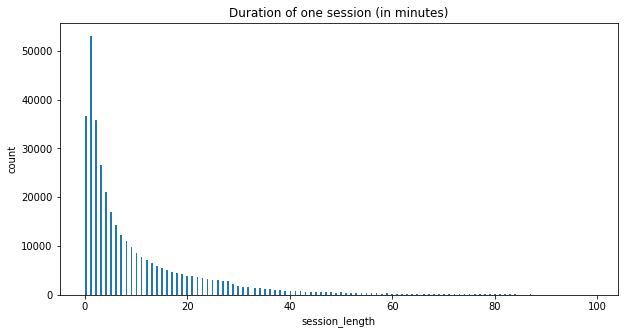

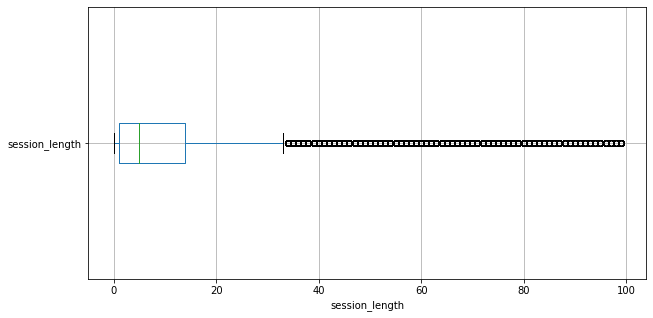

In [17]:
# Display histogram and boxplot for sessions shorter than 100 minutes
show_hist_and_boxplot(visits_df.query('session_length < 100'))

In [18]:
# funtion to display histogram and boxplot
def histbox(values, figsize=(8, 8), title=None, bins=11, xlabel=None, whis=1.5, label='Histogram', 
            flierprops=dict(markerfacecolor='r', marker='s'), boxprops=dict(color='white'), whiskerprops=dict(color='#FFC358'), xlim=None, **kwargs):
    fig, ax1 = plt.subplots(figsize=figsize)
    plt.title(title)
    ax1.hist(values, bins=bins, label=label, **kwargs)
    ax1.set_xlabel(xlabel)
    ax1.legend()
    ax1.set_xlim(xlim)
    ax1.grid(True)
    ax2 = ax1.twinx()
    
    ax2.boxplot(values, vert=False, whis=whis, notch=True, capprops=whiskerprops, 
                flierprops=flierprops, boxprops=boxprops, whiskerprops=whiskerprops)
    ax2.set_xlim(xlim)
    plt.show()

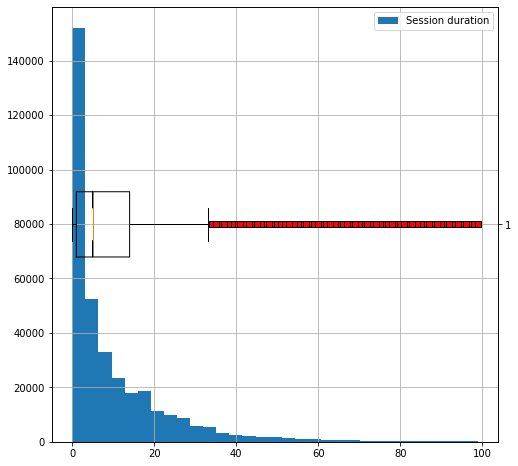

In [19]:
histbox(visits_df.query('session_length < 100')['session_length'], bins=31,
       boxprops=dict(color='black'), whiskerprops=dict(color='black'), label='Session duration')

As you can see from the histogram and boxplot, the distribution of session length is not normal and contains outliers. Thus, it is advisable to use the median to estimate the average session duration.

In [20]:
session_length_median = visits_df['session_length'].median()
print("Average session lasts {:.1f} minutes".format(session_length_median))


Average session lasts 5.0 minutes


### Conclusion

A typical session lasts between 2 and 14 minutes, with a median of 5 minutes. At the same time, there are "outliers" with a long session from 100 to 1400 minutes (more than 23 hours).

### How often users return (Retention Rate)

In [21]:
# For each user let's find the date and time of the first visit
first_activity_ts = visits_df.groupby(['uid'])['start_ts'].min()
first_activity_ts.name = 'first_activity_ts'

# Add info about first visit to visits_df
visits_df = visits_df.join(first_activity_ts,on='uid')

In [22]:
# Add month of the first visit to visits_df
visits_df['first_activity_month'] = visits_df['first_activity_ts'].astype('datetime64[M]')

# Calculate cohort lifetime (in months)
visits_df['cohort_lifetime'] = (visits_df['session_month'] - visits_df['first_activity_month'])
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'] / np.timedelta64(1,'M')
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'].round().astype(int)

In [23]:
# Group data by cohort and lifetime. 
# For each cohort calculate number of active users for a certain month of lifetime.
visits_cohorts = visits_df.groupby(['first_activity_month','cohort_lifetime'])\
.agg(n_uid = pd.NamedAgg(column='uid', aggfunc='nunique')).reset_index()

# Find the initial number of users in the cohort
initial_users_count = visits_cohorts[visits_cohorts['cohort_lifetime'] == 0][['first_activity_month','n_uid']]
initial_users_count = initial_users_count.rename(columns={'n_uid':'cohort_users'})

# Merge info about initial users count to cohorts data 
visits_cohorts = visits_cohorts.merge(initial_users_count,on='first_activity_month')

# Calculate Retention Rate
visits_cohorts['retention'] = visits_cohorts['n_uid']/visits_cohorts['cohort_users']

In [24]:
# Make pivot table
retention_pivot = visits_cohorts.pivot_table(
    index='first_activity_month', 
    columns='cohort_lifetime', 
    values='retention')

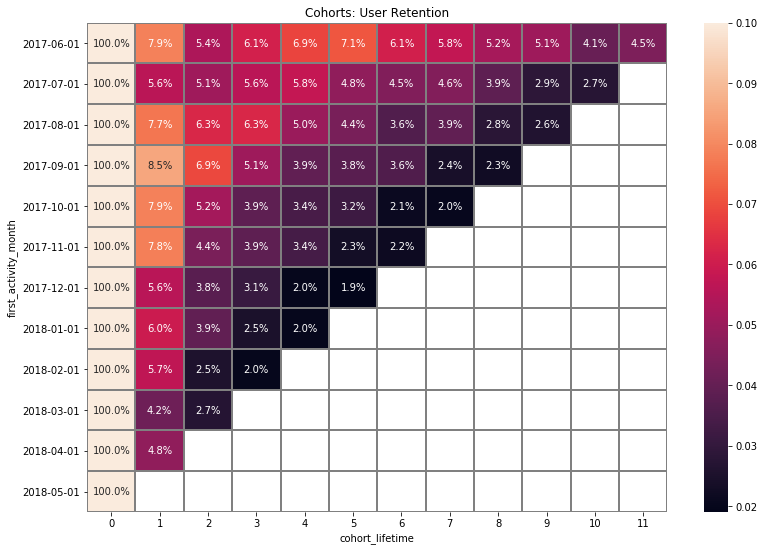

In [25]:
# Function to display pivot table on heatmap
def draw_heatmap(pivot_table, heatmap_title, format='.1f', value_max=None):
    fig, ax = plt.subplots(figsize = (13, 9))
    y_axis_labels = pivot_table.index.strftime('%Y-%m-%d')
    ax = sns.heatmap(
        pivot_table, 
        annot=True, 
        fmt=format, 
        linewidths=1, 
        linecolor='gray', 
        vmax=value_max, 
        yticklabels=y_axis_labels)
    plt.yticks(rotation = 0)
    plt.title(heatmap_title)

# Display retention rate on heatmap
draw_heatmap(pivot_table=retention_pivot, heatmap_title='Cohorts: User Retention', format='.1%', value_max=0.1)

In [26]:
# Calculate mean retention rate for the first month after the formation of the cohort
retention_rate_mean = retention_pivot[1].mean()

print('Mean retention_rate for the first month after the formation of the cohort is {:.1%}'.format(retention_rate_mean))

Mean retention_rate for the first month after the formation of the cohort is 6.5%


### Conclusion

The average Retention Rate in the first month after the formation of the cohort is 6.5%. The highest Retention Rate (about 8%) is observed in cohorts that formed from June to November. The exception is the July cohort, where the first month's Retention Rate was 5.6%.  
Starting from December 2017, the first month's Retention Rate has been decreasing and is about 5%.  
As the lifetime of the cohort increases, the Retention Rate falls. Moreover, this drop is much more pronounced in the cohorts formed towards the end of the study period (starting from November 2017).

### When people start to buy

In [27]:
# For each user find the date of the first purchase
first_order_ts = orders_df.groupby(['uid'])['buy_ts'].min()
first_order_ts.name = 'first_order_ts'

# create a dataframe that will contain the date of the first visit, the date of the first purchase
# and time elapsed from first visit to first purchase
time_to_first_order_df = pd.DataFrame()
time_to_first_order_df['first_activity_ts'] = first_activity_ts
time_to_first_order_df = time_to_first_order_df.join(first_order_ts, on='uid')

# Remove info about users who have not yet made a purchase
time_to_first_order_df = time_to_first_order_df.dropna()

# calculate how long it took from the first visit to the first purchase
time_to_first_order_df['time_to_first_order'] = \
time_to_first_order_df['first_order_ts'] - time_to_first_order_df['first_activity_ts']

display(time_to_first_order_df.head())

# evaluate how the time is distributed from the first visit to the first purchase
display(time_to_first_order_df['time_to_first_order'].describe())

,first_activity_ts,first_order_ts,time_to_first_order
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


count                      36522
mean     16 days 21:40:50.532281
std      47 days 01:45:34.984683
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:30
max            363 days 07:04:00
Name: time_to_first_order, dtype: object

As you can see from the metrics obtained by the "describe" method, time_to_first_order is unevenly distributed and contains outliers. In this regard, the median will be used as measure of average.

In [28]:
# Calculate median
time_to_first_order_median = time_to_first_order_df['time_to_first_order'].median()

print('On average, it takes {} from the moment of the first visit to the moment of the first purchase'.format(time_to_first_order_median))


On average, it takes 0 days 00:16:00 from the moment of the first visit to the moment of the first purchase


### Conclusion

On average, it takes 16 minutes from the moment of user's first visit to the moment of his first purchase. That means, the majority of users who made a purchase on Yandex.Afishe did it already during the first session.

### How many purchases visitors do for the period

Let's use month as a period for wich calculations will be done.  
So, let's form the cohorts according to the month of the first purchase and add lifetime.

In [29]:
# Add info about month of the order to order_df
orders_df['order_month'] = orders_df['buy_ts'].astype('datetime64[M]')

# Add to order_df date and time of the first purchase for each buyer
orders_df = orders_df.join(first_order_ts, on='uid')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Add to order_df info about the month of the first purchase
orders_df['first_order_month'] = orders_df['first_order_ts'].astype('datetime64[M]')

# Calculate cohorts lifetime (in months)
orders_df['cohort_lifetime'] = (orders_df['order_month'] - orders_df['first_order_month'])
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'] / np.timedelta64(1,'M')
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'].round().astype(int)
display(orders_df.head())

,buy_ts,revenue,uid,order_month,first_order_ts,first_order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,0


In [31]:
# Function for forming buyers cohorts
def make_cohort(df):
    # Group the table of orders by the month of the first purchase and the month of each order and sum up the revenue.
    orders_cohorts = df.groupby(['first_order_month','cohort_lifetime']).agg(
        n_buyers = pd.NamedAgg(column='uid', aggfunc='nunique'), 
        n_orders = pd.NamedAgg(column='uid', aggfunc='count'), 
        revenue = pd.NamedAgg(column='revenue', aggfunc='sum')
    ).reset_index()
    
    # Find the original number of buyers in the cohort and call it cohort_buyers
    initial_buyers_count = orders_cohorts[orders_cohorts['cohort_lifetime'] == 0]\
    [['first_order_month','n_buyers']]
    initial_buyers_count = initial_buyers_count.rename(columns={'n_buyers':'cohort_buyers'})

    # Merge initial buyers count to cohorts data
    orders_cohorts = orders_cohorts.merge(initial_buyers_count,on='first_order_month')
    
    return orders_cohorts

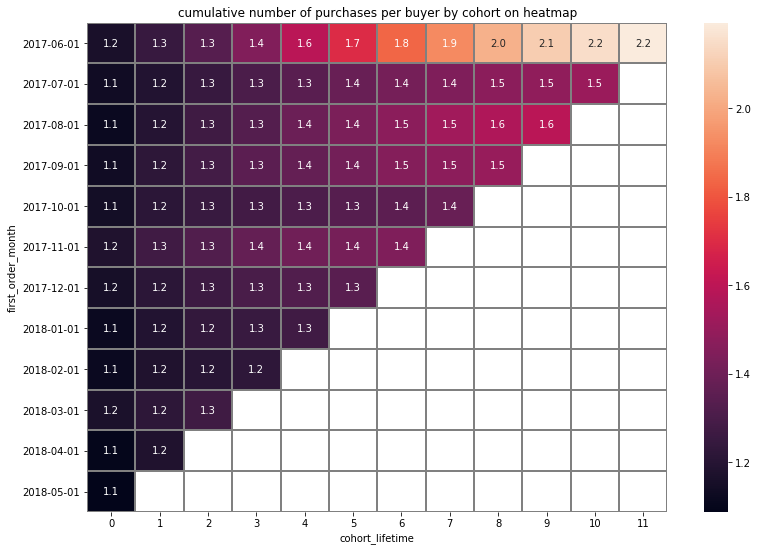

In [32]:
# Group data by cohort and lifetime. 
# Calculate for each cohort number of buyers and number of purchases
orders_cohorts = make_cohort(orders_df)

# Calculate number of orders per buyer
orders_cohorts['orders_per_buyer'] = \
orders_cohorts['n_orders'] / orders_cohorts['cohort_buyers']

# Make a pivot table
orders_per_buyer_pivot = orders_cohorts.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='orders_per_buyer').cumsum(axis=1)

# Display the cumulative number of purchases per buyer by cohort on heatmap
draw_heatmap(pivot_table=orders_per_buyer_pivot, 
             heatmap_title='cumulative number of purchases per buyer by cohort on heatmap')


In [33]:
# Посчитаем средние значения
print('During the first month each customer on average makes {:.1f} purchases'\
      .format(orders_per_buyer_pivot[0].mean()))
print('During the first 3 months each customer on average makes {:.1f} purchases'\
      .format(orders_per_buyer_pivot[2].mean()))
print('During the first 6 months each customer on average makes {:.1f} purchases'\
      .format(orders_per_buyer_pivot[5].mean()))
print('During the first 9 months each customer on average makes {:.1f} purchases'\
      .format(orders_per_buyer_pivot[8].mean()))

During the first month each customer on average makes 1.1 purchases
During the first 3 months each customer on average makes 1.3 purchases
During the first 6 months each customer on average makes 1.4 purchases
During the first 9 months each customer on average makes 1.6 purchases


### Conclusion

Each customer makes an average of 1.1 purchases during the first month, 1.4 purchases during the first 6 months, and 1.6 purchases during the first 9 months. This number of purchases per customer is typical for all cohorts, except for the first one (June 2017). In this cohort, the rates were higher. Thus, in the first 6 months, buyers belonging to this cohort made an average of 1.7 purchases, and in the first 9 months - 2 purchases.


### What is the average bill

In [34]:
# Calculate the average check for the entire period
mean_bill = orders_df['revenue'].mean()
print('average check for the entire period is {:.2f} dol.'.format(mean_bill))

average check for the entire period is 5.00 dol.


In [35]:
# Add to order_df info about order date
orders_df['order_date'] = orders_df['buy_ts'].astype('datetime64[D]')

# Group orders by date and calculate average check
mean_bill_per_date = orders_df.groupby(['order_date']).agg(
    mean_bill = pd.NamedAgg(column = 'revenue', aggfunc='mean')
).reset_index()

# Group orders by months and calculate average check
mean_bill_per_month = orders_df.groupby(['order_month']).agg(
    mean_bill = pd.NamedAgg(column = 'revenue', aggfunc='mean')
).reset_index()

# Calculate min and max value of average check by months
print('Average check by months varies from {:.2f} to {:.2f} dol.'\
      .format(mean_bill_per_month['mean_bill'].min(), \
      mean_bill_per_month['mean_bill'].max()))

Average check by months varies from 4.06 to 5.85 dol.


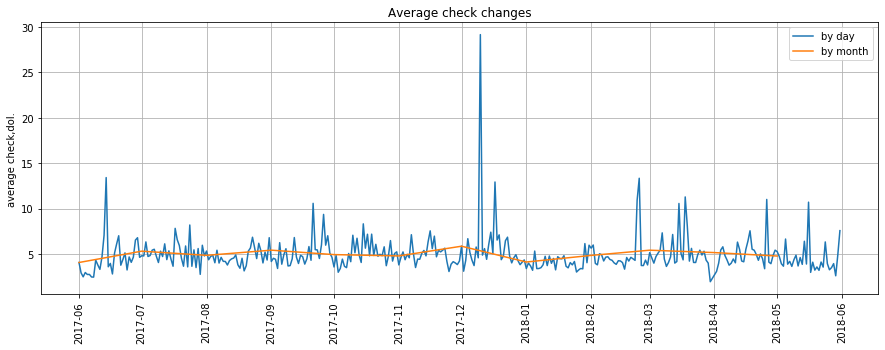

In [36]:
# Display average check changes throughout the year
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot('order_date', 'mean_bill', data=mean_bill_per_date)
ax.plot('order_month', 'mean_bill', data=mean_bill_per_month)
plt.legend(['by day', 'by month'])
# Set xticks as year-month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Average check changes')
plt.ylabel('average check,dol.')

plt.grid()
plt.show()


As you can see from the graph, average check varies little from month to month. At the same time, the average daily check contains pronounced peaks. Let's Find out on which days the average check was the highest.

In [37]:
display(mean_bill_per_date.sort_values(by='mean_bill', ascending = False).head())

,order_date,mean_bill
192,2017-12-10,29.133313
13,2017-06-14,13.403396
268,2018-02-24,13.328986
199,2017-12-17,12.916950
290,2018-03-18,11.273562


In [38]:
# To understand the reason of extremely large chek on 2017-12-10 let's see what purchases were done on that date
display(orders_df[orders_df['order_date'] == '2017-12-10'].sort_values(by='revenue', ascending = False).head(10))


,buy_ts,revenue,uid,order_month,first_order_ts,first_order_month,cohort_lifetime,order_date
23244,2017-12-10 20:17:00,2633.28,5539673724080479777,2017-12-01,2017-09-20 19:55:00,2017-09-01,3,2017-12-10
23165,2017-12-10 13:04:00,1195.64,5539673724080479777,2017-12-01,2017-09-20 19:55:00,2017-09-01,3,2017-12-10
23196,2017-12-10 15:58:00,243.83,5539673724080479777,2017-12-01,2017-09-20 19:55:00,2017-09-01,3,2017-12-10
23205,2017-12-10 16:27:00,36.67,2858844541699580113,2017-12-01,2017-12-10 14:33:00,2017-12-01,0,2017-12-10
23136,2017-12-10 06:13:00,34.83,970975784987511180,2017-12-01,2017-11-04 14:03:00,2017-11-01,1,2017-12-10
23225,2017-12-10 18:39:00,20.17,970975784987511180,2017-12-01,2017-11-04 14:03:00,2017-11-01,1,2017-12-10
23190,2017-12-10 15:20:00,17.78,1200146875600316248,2017-12-01,2017-12-10 15:20:00,2017-12-01,0,2017-12-10
23231,2017-12-10 19:13:00,12.22,16133872958172068916,2017-12-01,2017-12-10 19:13:00,2017-12-01,0,2017-12-10
23145,2017-12-10 10:34:00,10.51,11920452646463905188,2017-12-01,2017-06-03 11:27:00,2017-06-01,6,2017-12-10
23141,2017-12-10 09:50:00,9.90,2979688828418358701,2017-12-01,2017-12-10 09:50:00,2017-12-01,0,2017-12-10


As you can see, such a large average check is caused not by the fact that all buyers bought more that day (for example, in connection with a sale), but by the fact that one client made 3 very large purchases.

### Conclusion

The average check for the entire studied period was about 5.00 dol. By months it varied from 4.06 to 5.85 dol. The maximum average check was observed in December, the minimum - in June and January.  
If we consider the value of the average check by day, we can see the presence of "outliers" with an abnormally high average check. So, on October 12, 2017, the average check was 29.13 dol., which is almost 6 times higher than the average value for the entire study period. As further analysis showed, such a large average check is caused by the fact that one client made 3 very large purchases.

### How much money users bring (LTV)

#### Form cohorts for calculating LTV

Find the source of the first visit for each visitor

In [39]:
# Find the source of the first visit for each visitor
first_visits = visits_df.loc[visits_df['start_ts'] == visits_df['first_activity_ts']]
first_visits_source = first_visits[['uid', 'source_id']]
first_visits_source = first_visits_source.rename(columns = {'source_id': 'first_visit_source_id'})

# Add info about the source of the first visit to visits_df
visits_df = visits_df.merge(first_visits_source,on='uid')
display(visits_df.head())

# Add info about the source of the first visit to orders_df
orders_df = orders_df.merge(first_visits_source,on='uid')


,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date,session_length,first_activity_ts,first_activity_month,cohort_lifetime,first_visit_source_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-18,2017-12-20,18,2017-12-20 17:20:00,2017-12-01,0,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19,2018-02-19,28,2018-02-19 16:53:00,2018-02-01,0,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-14,2018-05-20,24,2018-03-09 20:05:00,2018-03-01,2,4
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-05,2018-03-09,28,2018-03-09 20:05:00,2018-03-01,0,4


In [40]:
# Find out how many buyers  came from each source
buyers_by_source = orders_df.groupby('first_visit_source_id')['uid'].count()
display(buyers_by_source)

first_visit_source_id
1      5223
2      6392
3     13289
4     12894
5      9406
7         1
9      1647
10     1562
Name: uid, dtype: int64

Divide users into cohorts for each source and calculate LTV

In [41]:
# Create cohorts of buyers regardless of the source
orders_cohorts_all_sources = make_cohort(orders_df)

# Create separate cohorts of buyers who came from different sources 
# except the 7th source, because only one user came from it
orders_cohorts_source_1 = make_cohort(orders_df.query('first_visit_source_id == 1'))
orders_cohorts_source_2 = make_cohort(orders_df.query('first_visit_source_id == 2'))
orders_cohorts_source_3 = make_cohort(orders_df.query('first_visit_source_id == 3'))
orders_cohorts_source_4 = make_cohort(orders_df.query('first_visit_source_id == 4'))
orders_cohorts_source_5 = make_cohort(orders_df.query('first_visit_source_id == 5'))
orders_cohorts_source_9 = make_cohort(orders_df.query('first_visit_source_id == 9'))
orders_cohorts_source_10 = make_cohort(orders_df.query('first_visit_source_id == 10'))

cohorts_list = [
    [orders_cohorts_all_sources, 'all'], 
    [orders_cohorts_source_1, '1'], 
    [orders_cohorts_source_2, '2'], 
    [orders_cohorts_source_3, '3'], 
    [orders_cohorts_source_4, '4'], 
    [orders_cohorts_source_5, '5'], 
    [orders_cohorts_source_9, '9'],
    [orders_cohorts_source_10, '10']
]

# Calculate LTV for each cohort
for cohort in cohorts_list:
    cohort[0]['ltv'] = cohort[0]['revenue'] / cohort[0]['cohort_buyers']


For cohorts containing all users (regardless of source), display on a heatmap the change in LTV throughout the lifetime of the cohort

In [42]:
# Function for creating a pivot table by ltv with accumulation
def make_pivot_table(df, value_column):
    pivot = df.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values=value_column, 
        aggfunc='mean').round(2).cumsum(axis=1)
    return pivot

# Function for calculating average LTV over 6 months
def calculate_ltv_for_6_month(df):
    ltv_pivot = make_pivot_table(df[0], 'ltv')
    month6_ltv_mean = ltv_pivot[5].mean()
    return month6_ltv_mean

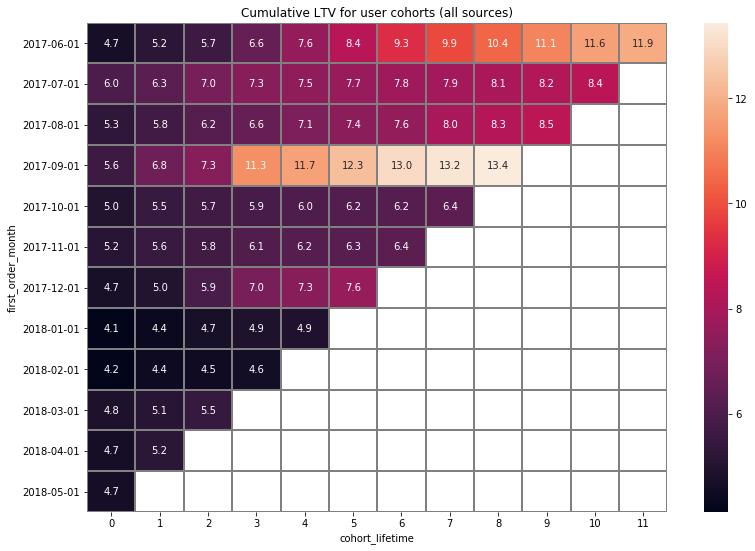

In [43]:
# Build a stacked pivot table   
ltv_pivot = make_pivot_table(orders_cohorts_all_sources, 'ltv')

# Display on heatmap buyers LTV by cohort
draw_heatmap(pivot_table=ltv_pivot, 
             heatmap_title='Cumulative LTV for user cohorts (all sources)')


In [44]:
# Calculate average LTV for 3, 6 and 9 months
print('On average (not considering the source), each client brings:')
print('- for 3 months: {:.2f} dol.'.format(ltv_pivot[2].mean()))
print('- for 6 months: {:.2f} dol.'.format(ltv_pivot[5].mean()))
print('- for 9 months: {:.2f} dol.'.format(ltv_pivot[8].mean()))


On average (not considering the source), each client brings:
- for 3 months: 5.82 dol.
- for 6 months: 7.97 dol.
- for 9 months: 10.06 dol.


For users from each source, let's calculate the average LTV for 6 months.  
The period of 6 months was chosen for the following reasons:  
- this period is long enough to calculate LTV;
- a sufficient number of cohorts (7) have reached this "life period" so that the average value can be calculated.

In [45]:
# Calculate LTV for 6 month for each source
user_metrics = pd.DataFrame(columns=['source_id', 'ltv_6month'])

for cohort in cohorts_list:
    user_metrics = user_metrics.append(
        {'source_id': cohort[1], 'ltv_6month': round(calculate_ltv_for_6_month(cohort), 2)}, ignore_index=True)

display(user_metrics.sort_values(by='ltv_6month', ascending = False))

,source_id,ltv_6month
2,2,15.49
1,1,12.01
5,5,9.35
0,all,7.97
4,4,6.03
6,9,5.82
3,3,5.73
7,10,3.93


### Вывод

The average buyer LTV (across all sources) is 5.82 dol. for 3 months, 7.97 for 6 months and 10.06 for 9 months.
The exception is the September 2017 cohort, in which LTV significantly exceeded the average (more than 13 dol. for 6 month).  
The obtained average LTV values generally correspond to the previously obtained data on the number of purchases per customer and the value of the average check. For the first 6 months, buyers made 1.4 purchases on average with an average check size of 5.00 dol. Thus, for 6 months they spent `1.4 purchases * 5.00 dol. = 7.00 dol.` This value is close to the 6 months LTV value obtained in current section of the study.  
LTV for 6 months was higher than the average for users who came from sources with id = 2 (15.49 dol.), id = 1 (12.01 dol.), id = 5 (9.35 dol.). Later we will check whether LTV has recouped the cost of attracting users through these sources.


### How much money was spent on marketing. Total / per source / by time

In [46]:
# Сalculate the total amount of money spent on marketing during the study period
marketing_costs_sum = costs_df['costs'].sum()
print('Total amount of money spent on marketing during the study period: {:n} dol.'.format(marketing_costs_sum))
print()

# Group marketing costs by advertising source
marketing_costs_by_source = costs_df.groupby('source_id')['costs'].sum().round().astype(int).reset_index()
print('Marketing costs by advertising source, descending amount spent:')
display(marketing_costs_by_source.sort_values(by='costs', ascending=False))

Total amount of money spent on marketing during the study period: 329132 dol.

Marketing costs by advertising source, descending amount spent:


,source_id,costs
2,3,141322
3,4,61074
4,5,51757
1,2,42806
0,1,20833
6,10,5822
5,9,5517


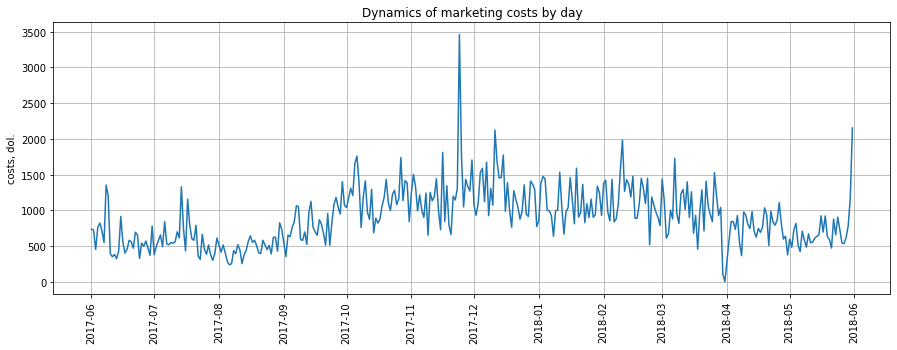

The maximum value of daily marketing costs was 3458 dol.
The maximum marketing costs were on: 2017-11-24


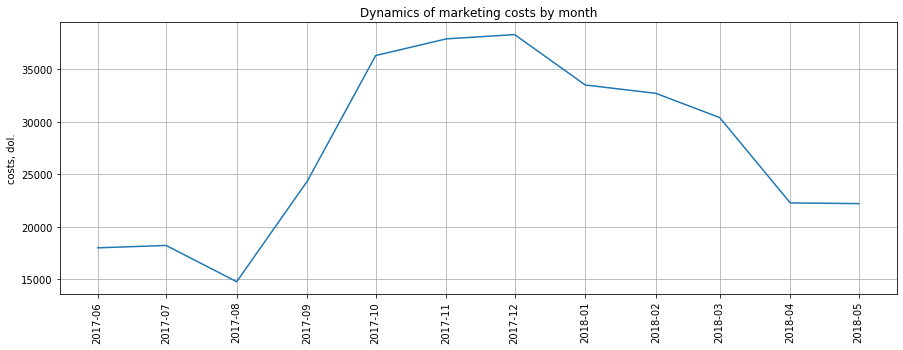

In [47]:
# Group marketing costs by date and month
marketing_costs_by_dt = costs_df.groupby('dt')['costs'].sum().reset_index()
costs_df['month'] = costs_df['dt'].astype('datetime64[M]')
marketing_costs_by_month = costs_df.groupby('month')['costs'].sum().reset_index()

# display the change in marketing costs by day during the year
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot('dt', 'costs', data=marketing_costs_by_dt)
# Set xticks as year-month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Dynamics of marketing costs by day')
plt.ylabel('costs, dol.')

plt.grid()
plt.show()

# Calculate on what day costs were the highest
costs_max = marketing_costs_by_dt['costs'].max()
costs_max_date = marketing_costs_by_dt[marketing_costs_by_dt['costs'] == costs_max]['dt']
print("The maximum value of daily marketing costs was {} dol.".format(int(costs_max)))
print('The maximum marketing costs were on: ' + costs_max_date.to_string(index=False))

# Display the change in marketing costs during the year by months
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot('month', 'costs', data=marketing_costs_by_month)
# Set xticks as year-month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation = 90)
plt.title('Dynamics of marketing costs by month')
plt.ylabel('costs, dol.')

plt.grid()
plt.show()

In [48]:
# calculate the correlation (Pearson coefficient) between marketing costs and the number of active users
print('Correlation coefficient between daily marketing costs and DAU is {:.2f}'\
              .format(marketing_costs_by_dt['costs'].corr(dau['n_uid'])))

print('Correlation coefficient between monthly marketing costs and MAU is {:.2f}'\
              .format(marketing_costs_by_month['costs'].corr(mau['n_uid'])))

Correlation coefficient between daily marketing costs and DAU is 0.86
Correlation coefficient between monthly marketing costs and MAU is 0.98


### Conclusion

In total, 329,132 dol. were spent on marketing during the study period. The most were spent on an advertising source with id = 3 (141 322 dol.), and the least on a source with id = 9 (5 517).  
Most of the costs are in the period November 2017 - March 2018 (more than 3 000 dol. monthly). The highest daily costs were 2017-11-24 and amounted to 3 458 dol.  
As can bee seen from the graphs, both daily and monthly marketing costs are distributed in the same way as the number of active users. The relationship between these two metrics is confirmed by a very high correlation coefficient. As a conclusion we can say that the number of attracted buyers directly depends on spent marketing costs.

### How much did it cost to attract one customer from each source? (Customer Acquisition Cost )

#### Calculate average CAC value

In [49]:
# Adding monthly costs data to cohorts
def add_month_costs_to_cohort(cohorts, df):
    monthly_costs = df.groupby('month')['costs'].sum().reset_index()
    cohorts = pd.merge(cohorts, monthly_costs, left_on='first_order_month', right_on='month')
    cohorts = cohorts.drop('month', axis=1)
    return cohorts

orders_cohorts_all_sources = add_month_costs_to_cohort(orders_cohorts_all_sources, costs_df)
orders_cohorts_source_1 = add_month_costs_to_cohort(orders_cohorts_source_1, costs_df.query('source_id == 1'))
orders_cohorts_source_2 = add_month_costs_to_cohort(orders_cohorts_source_2, costs_df.query('source_id == 2'))
orders_cohorts_source_3 = add_month_costs_to_cohort(orders_cohorts_source_3, costs_df.query('source_id == 3'))
orders_cohorts_source_4 = add_month_costs_to_cohort(orders_cohorts_source_4, costs_df.query('source_id == 4'))
orders_cohorts_source_5 = add_month_costs_to_cohort(orders_cohorts_source_5, costs_df.query('source_id == 5'))
orders_cohorts_source_9 = add_month_costs_to_cohort(orders_cohorts_source_9, costs_df.query('source_id == 9'))
orders_cohorts_source_10 = add_month_costs_to_cohort(orders_cohorts_source_10, costs_df.query('source_id == 10'))

# Re-create a list containing cohorts by source
cohorts_list = [
    [orders_cohorts_all_sources, 'all'], 
    [orders_cohorts_source_1, '1'], 
    [orders_cohorts_source_2, '2'], 
    [orders_cohorts_source_3, '3'], 
    [orders_cohorts_source_4, '4'], 
    [orders_cohorts_source_5, '5'], 
    [orders_cohorts_source_9, '9'],
    [orders_cohorts_source_10, '10']
]


In [50]:
# Calculate CAC for cohorts
for cohort in cohorts_list:
    cohort[0]['cac'] = cohort[0]['costs'] / cohort[0]['cohort_buyers']


In [51]:
cac_mean = pd.DataFrame(columns=['source_id', 'cac_mean'])
# Calculate average CAC value for each source
for cohort in cohorts_list:
    cac_mean = cac_mean.append(
        {'source_id': cohort[1], 'cac_mean': round(cohort[0]['cac'].mean(), 2)}, ignore_index=True)


In [52]:
# Add CAC to user_metrics
user_metrics = user_metrics.merge(cac_mean, on='source_id')

display(user_metrics.sort_values(by='cac_mean'))

,source_id,ltv_6month,cac_mean
7,10,3.93,5.04
6,9,5.82,5.06
4,4,6.03,6.98
1,1,12.01,7.15
5,5,9.35,7.17
0,all,7.97,9.32
2,2,15.49,12.64
3,3,5.73,14.06


### Conclusion

The average CAC (across all sources) was 9.32 dol.  
Above average was the cost of attracting one customer from a source with id = 2 (cac was 12.64 dol.) and from a source with id = 3 (cac was 14.06 dol.). For other sources, cac was below average and amounted to 7.17 dol. and less. Later we will check correlation between LTV and CAC for all sources and for each source separately.

### How much the costs paid back (Return on marketing investment)

In [53]:
# Calculate ROMI
for cohort in cohorts_list:
    cohort[0]['romi'] = cohort[0]['ltv'] / cohort[0]['cac']


#### Calculate cumulative ROMI by cohorts and display it on a heatmap

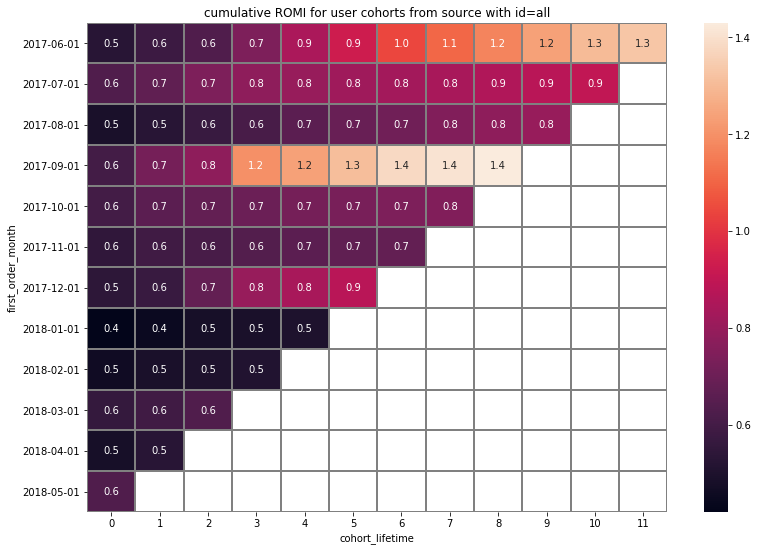

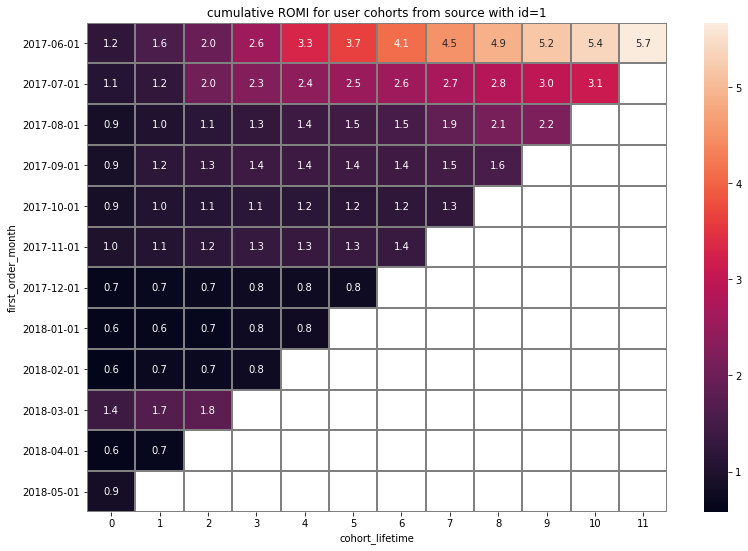

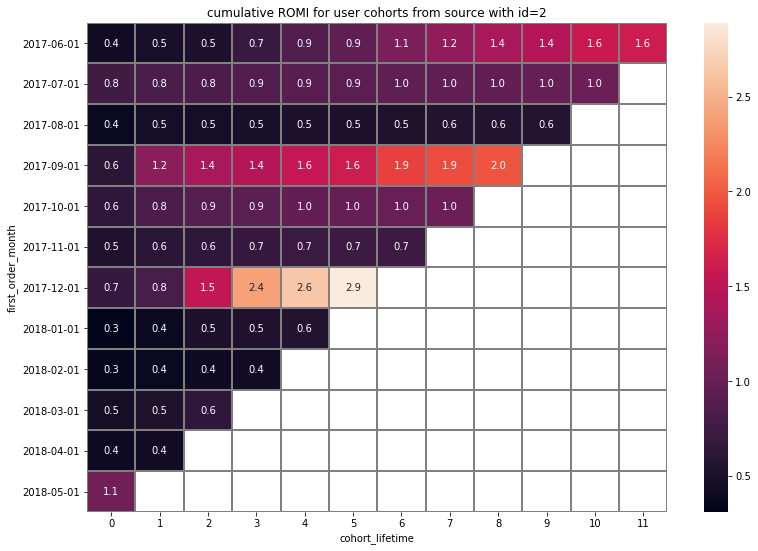

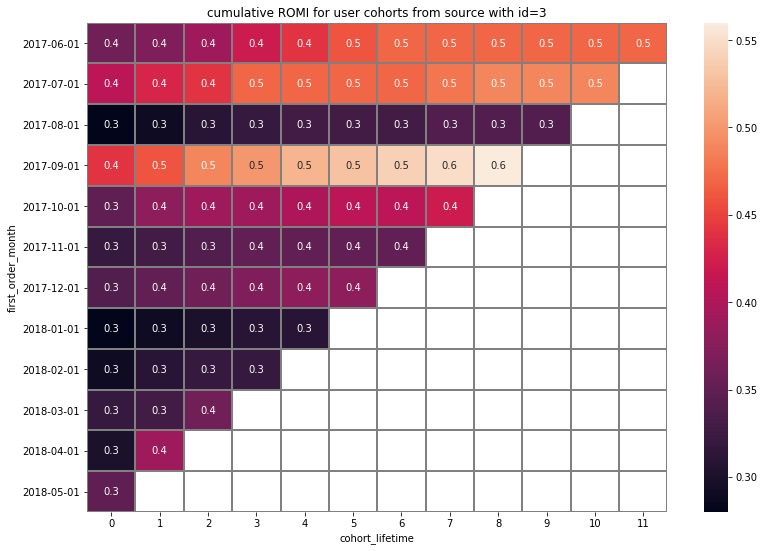

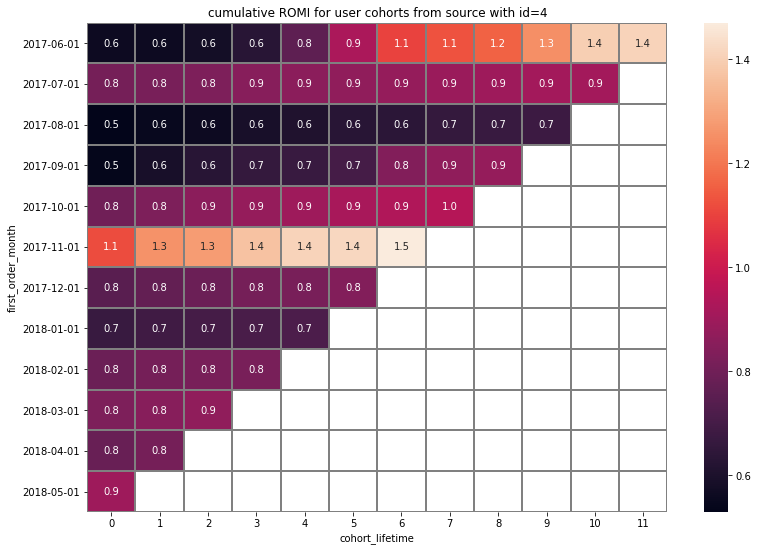

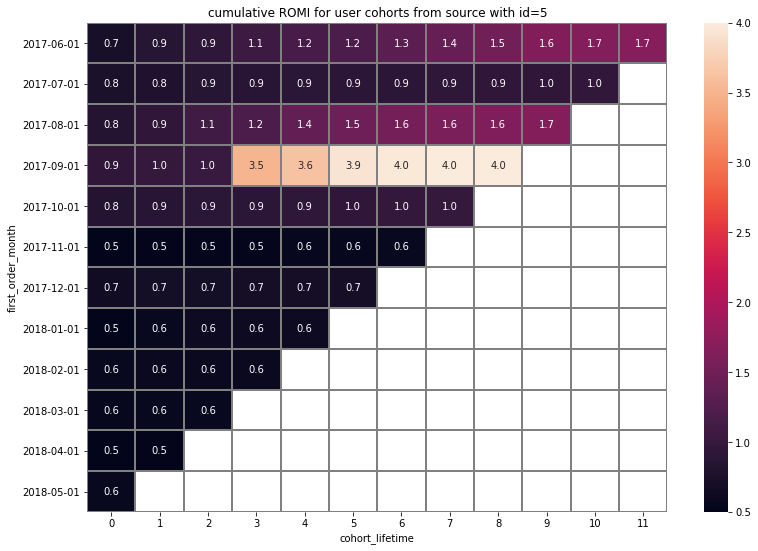

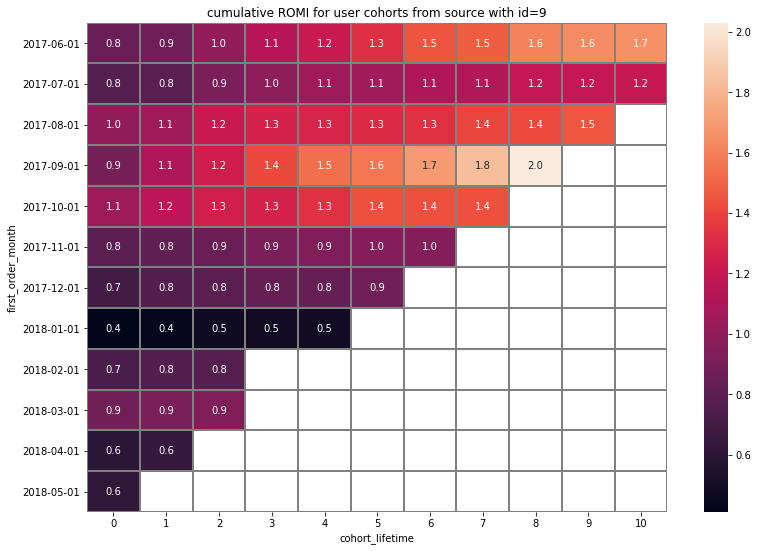

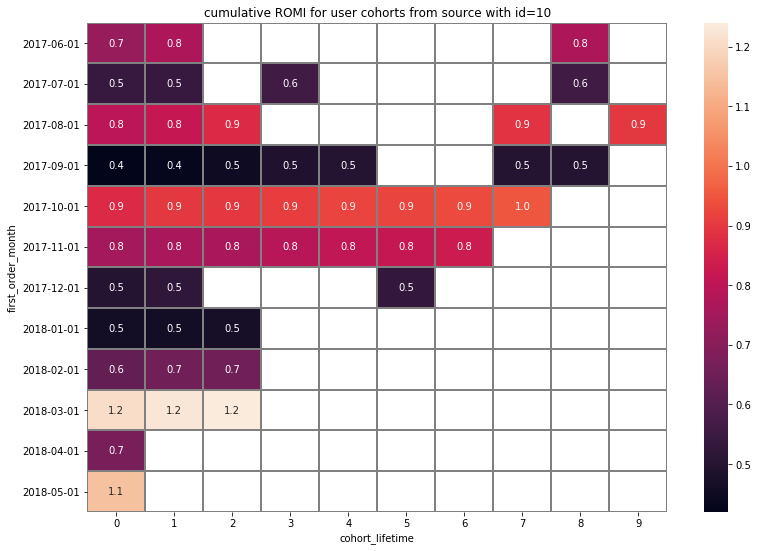

In [54]:
romi = pd.DataFrame(columns=['source_id', 'romi_3month', 'romi_6month', 'romi_9month'])
for cohort in cohorts_list:
    romi_pivot = make_pivot_table(cohort[0], 'romi')
    draw_heatmap(pivot_table=romi_pivot, 
             heatmap_title='cumulative ROMI for user cohorts from source with id={}'.format(cohort[1]))
    romi = romi.append(
        {'source_id': cohort[1], 
         'romi_3month': round(romi_pivot[2].mean(), 2), 
         'romi_6month': round(romi_pivot[5].mean(), 2), 
         'romi_9month': round(romi_pivot[8].mean(), 2)
        }, ignore_index=True)

In [55]:
display(romi.sort_values(by='romi_9month', ascending = False))

,source_id,romi_3month,romi_6month,romi_9month
1,1,1.26,1.76,2.86
5,5,0.78,1.39,2.02
6,9,0.94,1.22,1.56
2,2,0.78,1.23,1.22
0,all,0.63,0.86,1.06
4,4,0.79,0.90,0.90
7,10,0.76,0.76,0.61
3,3,0.37,0.42,0.47


### Conclusion

В среднем, расходы, потраченные на привлечение одного покупателя, за 6 месяцев окупаются на 86%, а к 9 месяцу окупаются полностью (средний накопительный romi за 9 месяцев составил 1.06). Сильно отличается от среднего когорта сентября 2017, которая окупилась уже на 4й месяц своего существования.  
Лучше всего окупаются маркетинговые вложения в источник с id=1. ROMI по данному источнику составляет 1.26 уже на 3 месяц жизни когорты, а за 9 месяцев достигает 2.86. Учитывая, что по количеству вложенных средств, данный источник находится лишь на 5м месте (за весь период в него было вложено 20833 у.е.), видится целесообразным увеличить рассходы на привлечение покупателей из данного источника.  
Источники с id=5 и id=9 также демонстрируют значения окупаемости значительно выше средних. Затраты на них также стоит увеличить.  

On average, the costs spent on attracting one customer are paid back by 86% in 6 months, and by the 9th month they are paid back in full (the average accumulative ROMI for 9 months was 1.06). September 2017 cohort was very different from the average, it was paid back already in the 4th month.  
Marketing investments in a source with id = 1 payed back best of all. ROMI of this source is 1.26 already after 3 months of cohort life, and for 9 months it reaches 2.86. Whyle by the ammount of spent cost this source is only on 5th place (over the entire period, it was spent 20,833 dol.), it seems expedient to increase the amount of investments to this source.  
Sources with id = 5 and id = 9 also demonstrate well above average ROMI values. Investments to these sources are also worth increasing.

## Step 3. General conclusions

As the result of the study,  following conclusions can be drawn.  
The number of attracted users directly depends on marketing costs: the more money are invested in marketing, the more active users given period has.  
Each visitor spends on average from 2 to 14 minutes on the Yandex.Afisha website. The visitors who made purchases made it already in the first session.  
However, the Retention Rate of visitors is quite low. Thus, in the first month it averages 6.5% and continues to decrease with age of the cohort.  
The number of repeat purchases is also low. During the first 6 months, each customer makes 1.4 purchases on average. The average bill for the study period was 5.00 dol. Thus, for 6 months, buyers spent 1.4 purchases * 5.00 dol. = 7.00 dol. This value is close to the calculated average LTV for 6 months, which amounted to 7.97 dol.  
The average CAC value (across all sources) was 9.32 dol. Accordingly, the cost of attracting one customer in 6 months is recouped by 86% on average, and by the 9th month they are paid back in full. The speed of payback depends on the advertising source from which users arrived. So, sources with id = 1, id = 5 and id = 9 pay back best of all. Thus, it seems expedient to revise marketing spending by significantly increasing spendings on these sources.